In [1]:
import numpy as np  
import matplotlib.pyplot as plt    
from matplotlib.ticker import ScalarFormatter   
from scipy.integrate import odeint

In [2]:
#Fixed parameter values
pi = 1710; 
#beta1 =1.72;
mu =1/(83*365); 
eps =0.33;   #Youngji paper
tau = 0.8; tau2 = 0.8;
psi = 0.5; 
phi1, phi2 = 1/180, 1/180
h1= 0.0012; 
h2 = (1-0.74)*h1;
rho = 1/14; rhot =1/10; rhoh =1/10;
eta1= 0.71; eta2= 0.41; eta4= 0.85; eta3 = 0.46;
a = 1/3  # fixed to be 3 days 
 

theta = 0.5 # parameter adjusting reduced perception risk (assumed)
delta = 0.8  # proportion of tested people who quarantine/adhere to protective measures (assumed)
alpha1, alpha2 = 0.5, 0.5  # parameters which shows to which information people are more concerned

Dtilde, Btilde = 5, 5  # reactivity to information in vaccination
D, B = 1*Dtilde, 1*Btilde # reactivity to information in testing (assumed equal)
Fmax = 0.027; F10 = 0.0029; F20 = (0.9)*F10;
Tmax = 0.5; T10 = 0.03; T20 = 0.03    #Tmax is adjusted to have a good fit
#Tmax = 0.022; T10 = 0.014; #T10 = 0.0013; 

# Fitted parameters
k1=  0.51
beta1=  0.67
beta2=  0.39
xi=  0.99
d1 =0.000071; d2 = 0.000073;  

In [3]:
#F10, F20, T10, T20 = 0,0,0,0.
#T20 =0;
S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;

C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + beta2*(1-eta1)*V1_dfe);

Z1 = rho + mu +xi*T10
Z2 = rho + mu +xi*T20
Z3 = rho +d1+mu+T10
Z4 = rho +d1+mu+T20
Z5 = rhot + h1 +mu
Z6 = rhot + h2 +mu
Z7 = rhoh + d2 +mu
#infection caused by infectious individuals in first dynamics
FI1_1 = C1*(1-delta)*tau*eps*T10/((eps+mu)*Z3*Z5) # Infection from tested but not isolated from I1
FI1_2 = C1*(1-delta)*(1-tau)*xi*eps*T10/((eps+mu)*Z1*Z5) #  Infection from tested but not isolated from A1
FI1_3 = C1*tau*eps/((eps+mu)*Z3)                  # Infection from I1
FI1_4 = C1*(1-tau)*eps*psi/((eps+mu)*Z1) # Infection from A1
FI1 = FI1_1 + FI1_2 + FI1_3 + FI1_4

#infection caused by infectious individuals in second dynamics
FI2_1 = C2*(1-delta)*tau*eps*T20/((eps+mu)*Z4*Z6) # Infection from tested but not isolated from I1
FI2_2 = C2*(1-delta)*(1-tau)*xi*eps*T20/((eps+mu)*Z2*Z6) #  Infection from tested but not isolated from A1
FI2_3 = C2*tau*eps/((eps+mu)*Z3)                  # Infection from I1
FI2_4 = C2*(1-tau)*eps*psi/((eps+mu)*Z2) # Infection from A1
FI2 = FI2_1 + FI2_2 + FI2_3 + FI2_4

# Reproduction number for the model
Re = FI1 + FI2
print('Reproduction number =', Re)

Reproduction number = 0.6410777385361256


Text(0, 0.5, '$R_e$')

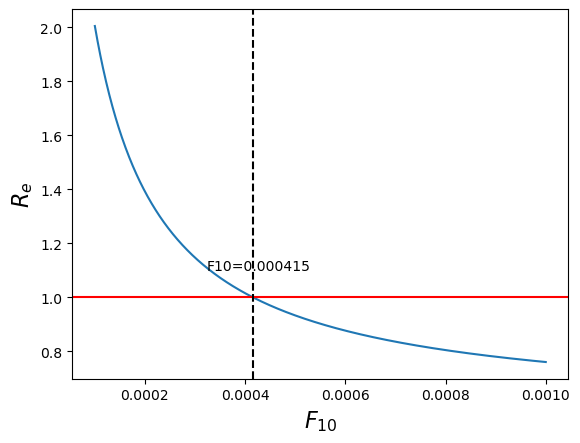

In [4]:
def Ef_Rep(F10):
    S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
    V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
    N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;
    
    C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + beta2*(1-eta1)*V1_dfe);
    Z1 = rho + mu +xi*T10
    Z2 = rho + mu +xi*T20
    Z3 = rho +d1+mu+T10
    Z4 = rho +d1+mu+T20
    Z5 = rhot + h1 +mu
    Z6 = rhot + h2 +mu
    Z7 = rhoh + d2 +mu
    #infection caused by infectious individuals in first dynamics
    FI1_1 = C1*(1-delta)*tau*eps*T10/((eps+mu)*Z3*Z5) # Infection from tested but not isolated from I1
    FI1_2 = C1*(1-delta)*(1-tau)*xi*eps*T10/((eps+mu)*Z1*Z5) #  Infection from tested but not isolated from A1
    FI1_3 = C1*tau*eps/((eps+mu)*Z3)                  # Infection from I1
    FI1_4 = C1*(1-tau)*eps*psi/((eps+mu)*Z1) # Infection from A1
    FI1 = FI1_1 + FI1_2 + FI1_3 + FI1_4
    
    #infection caused by infectious individuals in second dynamics
    FI2_1 = C2*(1-delta)*tau*eps*T20/((eps+mu)*Z4*Z6) # Infection from tested but not isolated from I1
    FI2_2 = C2*(1-delta)*(1-tau)*xi*eps*T20/((eps+mu)*Z2*Z6) #  Infection from tested but not isolated from A1
    FI2_3 = C2*tau*eps/((eps+mu)*Z3)                  # Infection from I1
    FI2_4 = C2*(1-tau)*eps*psi/((eps+mu)*Z2) # Infection from A1
    FI2 = FI2_1 + FI2_2 + FI2_3 + FI2_4
    
    # Reproduction number for the model
    Re = FI1 + FI2
    return Re
    
#F20 = np.linspace(0,0.0001,100)
F10 = np.linspace(0.0001,0.001,1000)
y1 = Ef_Rep(F10)
index_at_Re_equals_1 = np.argmin(np.abs(y1 - 1))
plt.plot(F10, y1)
plt.axhline(y=1,color = 'red')
plt.axvline(x=F10[index_at_Re_equals_1], color='black', linestyle='--')
plt.text(F10[index_at_Re_equals_1]+ 0.000012, 1.1, f'F10={F10[index_at_Re_equals_1]:.6f}', color='black', ha='center')
#plt.xlabel(r'$F_{20}$', fontsize =16)
plt.xlabel(r'$F_{10}$', fontsize =16)
plt.ylabel(r'$R_e$',fontsize =16)
#plt.savefig('ThresholdF10.pdf',dpi=600, bbox_inches='tight')


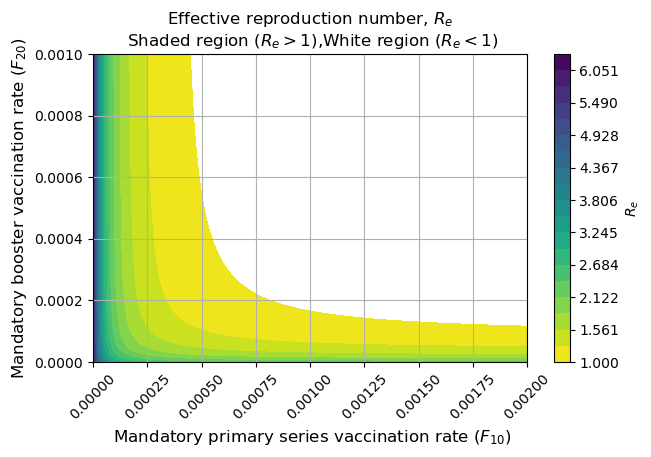

In [5]:

F10 = 0.0029
def Ef_Rep_function(F10,F20):
    S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
    V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
    N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;
    
    C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe + (1-eta1)*V1_dfe));
    Z1 = rho + mu +xi*T10
    Z2 = rho + mu +xi*T20
    Z3 = rho +d1+mu+T10
    Z4 = rho +d1+mu+T20
    Z5 = rhot + h1 +mu
    Z6 = rhot + h2 +mu
    Z7 = rhoh + d2 +mu
    #infection caused by infectious individuals in first dynamics
    FI1_1 = C1*(1-delta)*tau*eps*T10/((eps+mu)*Z3*Z5) # Infection from tested but not isolated from I1
    FI1_2 = C1*(1-delta)*(1-tau)*xi*eps*T10/((eps+mu)*Z1*Z5) #  Infection from tested but not isolated from A1
    FI1_3 = C1*tau*eps/((eps+mu)*Z3)                  # Infection from I1
    FI1_4 = C1*(1-tau)*eps*psi/((eps+mu)*Z1) # Infection from A1
    FI1 = FI1_1 + FI1_2 + FI1_3 + FI1_4
    
    #infection caused by infectious individuals in second dynamics
    FI2_1 = C2*(1-delta)*tau*eps*T20/((eps+mu)*Z4*Z6) # Infection from tested but not isolated from I1
    FI2_2 = C2*(1-delta)*(1-tau)*xi*eps*T20/((eps+mu)*Z2*Z6) #  Infection from tested but not isolated from A1
    FI2_3 = C2*tau*eps/((eps+mu)*Z3)                  # Infection from I1
    FI2_4 = C2*(1-tau)*eps*psi/((eps+mu)*Z2) # Infection from A1
    FI2 = FI2_1 + FI2_2 + FI2_3 + FI2_4
    
    # Reproduction number for the model
    Re = FI1 + FI2
    return Re

# def Basic_Rep_function(beta1):    
#     return (beta1*eps*((tau1+tau2)*(mu+rho) +(1-tau1)*psi1*(mu+rho+d1)))/((eps+mu)*(mu+rho)*(mu+rho+d1))
   
threshold = 1
# T10 = np.linspace(0, 1, 1000)
# T20 = np.linspace(0, 1, 1000)
F10 = np.linspace(0, 0.002, 1000)
F20 = np.linspace(0, 0.001, 1000)
#beta2 = np.linspace(0, 2, 1000)
# beta1 = np.linspace(0,8,1000)
#F20 = np.linspace(0, 0.0003, 1000)
x1,y1 = np.meshgrid(F10, F20)
#x1,y1 = np.meshgrid(T10, T20)

    
z1 = Ef_Rep_function(x1,y1)

fig, axs = plt.subplots(figsize =(7,4))


#contour_levels = np.linspace(z1.min(), threshold, 20)
contour_levels = np.linspace(threshold, z1.max(), 20)
#contour_levels = np.sort(contour_levels)
#contour = axs.contourf(x1, y1, z1, levels=[threshold, z1.max()], cmap='viridis', alpha=0.3)
contour = axs.contourf(x1, y1, z1, cmap='viridis_r', levels=contour_levels) # offset=z1.min(),cmap='viridis', alpha=0.3
# axs[1].contourf(x2, y2, z2, levels=[threshold, z2.max()], cmap='rainbow', alpha=0.3)
# axs[2].contourf(x3, y3, z3, levels=[threshold, z3.max()], cmap='rainbow', alpha=0.3)

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(x1, y1, z1, cmap='viridis', edgecolor='k')
# contour = ax.contourf(x1, y1, z1, levels=[threshold, z1.max()], zdir='z1', offset=z1.min(), cmap='rainbow', alpha=0.3)

# Add labels and title
# axs.set_xlabel(r'First transmission rate ($\beta_{1}$)')
#axs.set_xlabel(r'Second transmission rate ($\beta_{2}$)')
axs.set_xlabel(r' Mandatory primary series vaccination rate ($F_{10}$)', fontsize=12)
axs.set_ylabel(r'Mandatory booster vaccination rate ($F_{20}$)',fontsize=12)
# axs.set_xlabel(r'Mandatory Testing rate in primary dyn. ($T_{10}$)',fontsize=12)
# axs.set_ylabel(r'Mandatory Testing rate in Secondary dyn. ($T_{20}$)',fontsize=12)
#axs.xaxis.set_major_formatter('${:.0e}$'.format)
#axs.yaxis.set_major_formatter('${:.1e}$'.format)
plt.title('Effective reproduction number, $R_e$\n Shaded region ($R_e >1$),White region ($R_e <1$)', loc='center',fontsize=12)
#plt.title('Effective reproduction number $R_e$:\n Shaded region ($R_e <1$)', loc='center')
fig.colorbar(contour, label=r'$R_e$')
plt.grid(True)
plt.tick_params(axis='x', rotation=45)
plt.savefig('Region_stability_F10_F20_New_BB_1.png',dpi=600, bbox_inches='tight')
plt.show()

In [6]:
# Initial conditions
NN = 51815808
V2_0 = 2891 #int(0.87*Data_Omicron['new_vaccinations'].iloc[0])
V1_0 = 431; #int(0.13*Data_Omicron['new_vaccinations'].iloc[0])
E2_0 = 352645 #int(0.87*20*NewCases.iloc[0])
A2_0 = 70529 #int(0.2*E2_0)
I2_0 = 282116  #int(0.8*E2_0)
IT2_0 = 17632 #int(0.87*NewCases.iloc[0])
E1_0 = 52694 #int(0.13*20*NewCases.iloc[0])  # 0.13 indicates that 13% of the total population is in the first dynamics
A1_0 = 10538 #int(0.2*E1_0)
I1_0 = 42155 #int(0.8*E1_0)
IT1_0 = 2634 #int(0.13*NewCases.iloc[0])
H_0 = 202  # ICU
R_0 = 200
Dth_0 = 15
MV_0 = k1*((I1_0 + I2_0 + IT1_0 + IT2_0 + H_0)/NN)
MN_0 = k1*((H_0 + d1*(I1_0+I2_0) + d2*H_0)/NN)
S2_0 = 40000000 # 0.9*(Omicron_New_Cases['people_vaccinated'].iloc[0])
S3_0 = 4365186 #0.1*(Omicron_New_Cases['people_vaccinated'].iloc[0])
S1_0 = NN-(S2_0 + S3_0 + V1_0 + V2_0 + E1_0 + E2_0 + A1_0 + A2_0 + I1_0 + I2_0 + IT1_0 + IT2_0 + H_0 + R_0)


In [7]:
def sir_model(x,t,F10,F20, theta, alpha2):
    
    S1, S2, S3, V1, V2, E1, E2, A1, A2, I1, I2, I_T1, I_T2, H, R, Dth, MV, MN  = x
    dx = np.zeros(18)
    N= S1 + S2+ S3 + V1 + V2 + E1 + E2 + A1 + A2 + I1 + I2 + I_T1 + I_T2 + H + R
    
    T1 = T10 + (Tmax - T10)*(alpha1*(D*MV)/(1+D*MV) + (1-alpha1)*(B*MN)/(1+B*MN) )
    F1 = F10 + (Fmax - F10)*(alpha1*(Dtilde*MV)/(1+Dtilde*MV) + (1-alpha1)*(Btilde*MN)/(1+Btilde*MN))
    
    T2 = T10 + (Tmax - T10)*(alpha2*(theta*D*MV)/(1+theta*D*MV) + (1-alpha2)*(theta*B*MN)/(1+theta*B*MN))
    F2 = F20 + (Fmax - F20)*(alpha2*(theta*Dtilde*MV)/(1+theta*Dtilde*MV) + (1-alpha2)*(theta*Btilde*MN)/(1+theta*Btilde*MN))
    
    L1 = beta1*(I1 + I2 + psi*(A1 + A2) +(1-delta)*(I_T1 + I_T2))/(N-(delta*(I_T1 + I_T2) + H))
    L2 = beta2*(I1 + I2 + psi*(A1 + A2) +(1-delta)*(I_T1 + I_T2))/(N-(delta*(I_T1 + I_T2) + H))
    
    dx[0] = pi-(F1 +L1 +mu)*S1
    dx[1] = phi1*V1 -((1-eta2)*L2+F2+mu)*S2
    dx[2] = phi2*R-((1-eta3)*L2+F2+mu)*S3
    dx[3] = F1*S1-phi1*V1-(1-eta1)*L2*V1-mu*V1
    dx[4] = F2*S2+F2*S3-(1-eta4)*L2*V2-mu*V2
    dx[5] = L1*S1-(eps+mu)*E1
    dx[6] = (1-eta1)*L2*V1+(1-eta4)*L2*V2+L2*((1-eta2)*S2+(1-eta3)*S3)-(mu+eps)*E2
    dx[7] = (1-tau)*eps*E1-xi*T1*A1-(rho+mu)*A1
    dx[8] = (1-tau)*eps*E2-xi*T2*A2-(rho+mu)*A2
    dx[9] = tau*eps*E1-T1*I1-(rho+d1+mu)*I1
    dx[10] = tau*eps*E2-T2*I2-(rho+d1+mu)*I2
    dx[11] = xi*T1*A1+T1*I1-(rhot+h1+mu)*I_T1
    dx[12] = xi*T2*A2+T2*I2-(rhot+h2+mu)*I_T2
    dx[13] = h1*I_T1+h2*I_T2-rhoh*H-(d2+mu)*H
    dx[14] = rho*(A1+A2+I1+I2)+rhot*(I_T1+I_T2)+rhoh*H-(phi2+mu)*R
    dx[15] = d1*(I1+I2)+d2*H
    dx[16] = a*(k1*((I_T1+I_T2+I1+I2+H)/NN)-MV) 
    dx[17] = a*(k1*((H + d1*(I1 + I2) + d2*H)/NN)-MN)
    return dx

In [8]:
x0 = [S1_0, S2_0, S3_0, V1_0, V2_0, E1_0, E2_0, A1_0, A2_0, I1_0, I2_0, IT1_0, IT2_0, H_0, R_0, Dth_0, MV_0, MN_0]
t = np.linspace(0,120,120)

In [9]:
def Calculate_CI_TC(F10,F20,theta, alpha2):  
    S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
    V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
    N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;
    
    C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + beta2*(1-eta1)*V1_dfe);
    Z1 = rho + mu +xi*T10
    Z2 = rho + mu +xi*T20
    Z3 = rho +d1+mu+T10
    Z4 = rho +d1+mu+T20
    Z5 = rhot + h1 +mu
    Z6 = rhot + h2 +mu
    Z7 = rhoh + d2 +mu
    #infection caused by infectious individuals in first dynamics
    FI1_1 = C1*(1-delta)*tau*eps*T10/((eps+mu)*Z3*Z5) # Infection from tested but not isolated from I1
    FI1_2 = C1*(1-delta)*(1-tau)*xi*eps*T10/((eps+mu)*Z1*Z5) #  Infection from tested but not isolated from A1
    FI1_3 = C1*tau*eps/((eps+mu)*Z3)                  # Infection from I1
    FI1_4 = C1*(1-tau)*eps*psi/((eps+mu)*Z1) # Infection from A1
    FI1 = FI1_1 + FI1_2 + FI1_3 + FI1_4
    
    #infection caused by infectious individuals in second dynamics
    FI2_1 = C2*(1-delta)*tau*eps*T20/((eps+mu)*Z4*Z6) # Infection from tested but not isolated from I1
    FI2_2 = C2*(1-delta)*(1-tau)*xi*eps*T20/((eps+mu)*Z2*Z6) #  Infection from tested but not isolated from A1
    FI2_3 = C2*tau*eps/((eps+mu)*Z3)                  # Infection from I1
    FI2_4 = C2*(1-tau)*eps*psi/((eps+mu)*Z2) # Infection from A1
    FI2 = FI2_1 + FI2_2 + FI2_3 + FI2_4
    
    # Reproduction number for the model
    Re = FI1 + FI2

    ret = odeint(sir_model, x0, t, args=(F10,F20,theta, alpha2))
    
    Cum_infectious1[0] = A1_0 + A2_0 + I1_0 + I2_0; #Cum_tested1[0] = IT1_0 + IT2_0; Cum_hosp1[0] = H_0; Cum_vacc1[0] = V1_0 + V2_0
    
    for i0 in range(1,len(t)):
        Test1_1 = T10 + (Tmax -T10)*(alpha1* np.divide(D*ret[:i0+1,16],(1+D*ret[:i0+1,16])) + (1-alpha1)* np.divide(B*ret[:i0+1,17],(1+B*ret[:i0+1,17]))) 
        Test2_1 = T10 + (Tmax -T10)*(alpha2* np.divide(theta*D*ret[:i0+1,16],(1+theta*D*ret[:i0+1,16])) + (1-alpha2)* np.divide(theta*B*ret[:i0+1,17],(1+theta*B*ret[:i0+1,17])))

        Vac1_1 = F10 + (Fmax -F10)*(alpha1*np.divide(Dtilde*ret[:i0+1,16],(1+Dtilde*ret[:i0+1,16])) + (1-alpha1)*np.divide(Btilde*ret[:i0+1,17],(1+Btilde*ret[:i0+1,17])))
        Vac2_1 = F20 + (Fmax -F20)*(alpha2* np.divide(theta*Dtilde*ret[:i0+1,16],(1+theta*Dtilde*ret[:i0+1,16])) + (1-alpha2)* np.divide(theta*Btilde*ret[:i0+1,17],(1+theta*Btilde*ret[:i0+1,17])))
        
        Cum_infectious1[i0] = A1_0 + A2_0 + I1_0 + I2_0 + np.trapz(eps*(ret[:i0+1,5] + ret[:i0+1,6] ), t[:i0+1])
        # Cum_hosp1[i0] = H_0 + np.trapz(h1*ret[:i0+1,11] + h2*ret[:i0+1,12], t[:i0+1])
        # Cum_vacc1[i0] = V1_0 + V2_0 + np.trapz(np.multiply(Vac1_1,ret[:i0+1,0]) + np.multiply(Vac2_1,(ret[:i0+1,1]+ret[:i0+1,2])),t[:i0+1])
        # Cum_tested1[i0] = IT1_0 + IT2_0 + np.trapz(np.multiply(Test1_1,(xi*ret[:i0+1,7]+ ret[:i0+1,9])) + np.multiply(Test2_1,(xi*ret[:i0+1,8]+ ret[:i0+1,10])),t[:i0+1])

    Final_CumIncidence = Cum_infectious1[-1]
    
   
   # Return the peak number of infected individuals
    return Final_CumIncidence, Re

In [10]:
Cum_infectious1 = np.zeros(len(t)); 
#F_10range = [0.00001, 0.00025,0.0015,0.003]; F_20range = [0.004,0.004,0.004,0.004]
F_10range = [0,0.0001, 0.00045,0.004,0.008]; F_20range = [0,0.000001,0.00095,0.001,0.008]
#F_10range = [0.0001]; F_20range = [0.000001]
CI = []; CI_theta = []; CI_alpha2 = [];
Rep_number = []


In [11]:
F10 = 0.0001
F10 = 0.000001
theta = 0.95;
alpha2 = 0.95; alpha1 = 0.95
k1 =0.95    
Dtilde, Btilde = 10, 10  # reactivity to information in vaccination
D, B = 1*Dtilde, 1*Btilde
cum_incidence, Rep_num =  Calculate_CI_TC(0.0001,0.000001, 0.95, 0.95);
CI.append(cum_incidence)
Rep_number.append(Rep_num)

print('Reproduction numbers', Rep_number)
print('Cummulative incidence', CI)

Reproduction numbers [3.166362677957727]
Cummulative incidence [20370410.099880785]


In [12]:
# theta_range = [0.5,0.8,0.95];
# alpha2_range = [0.5,0.8,0.95];
# for j, (F10, F20) in enumerate(zip(F_10range,F_20range)):  
    
#     cum_incidence, Rep_num =  Calculate_CI_TC(F10,F20, theta, alpha2);
#     CI.append(cum_incidence)
#     Rep_number.append(Rep_num)
#     if j == 1:
#         for (theta,alpha2) in enumerate(zip(theta_range,alpha2_range)):
#             cum_incidence0, Rep_num =  Calculate_CI_TC(F10,F20,theta, alpha2);
#             CI_theta.append(cum_incidence0)
#         # for alpha2 in  [0.5,0.8,0.95]:
#         #     theta =0.5
#         #     cum_incidence01, Rep_num =  Calculate_CI_TC(F10,F20, theta, alpha2);
#         #     CI_alpha2.append(cum_incidence01)
#     theta = 0.5; alpha2 = 0.5; # restore the theta and alpha2 values to the base line
        
# print('Reproduction numbers', Rep_number)
# print('Cummulative incidence', CI)
# print('Cummulative incidence for theta and alpha 2', CI_theta)
#print('Cummulative incidence for alpha2', CI_alpha2)